In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
gdf=pd.read_csv("onlinefoods.csv")
print(gdf)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

# Data Understanding and Visualization

In [40]:
# Data Understanding and Visualization
# Display the first few rows of the dataset
print(gdf.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [41]:
# Summary statistics of numerical features
print(gdf.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


In [42]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [43]:
gdf.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

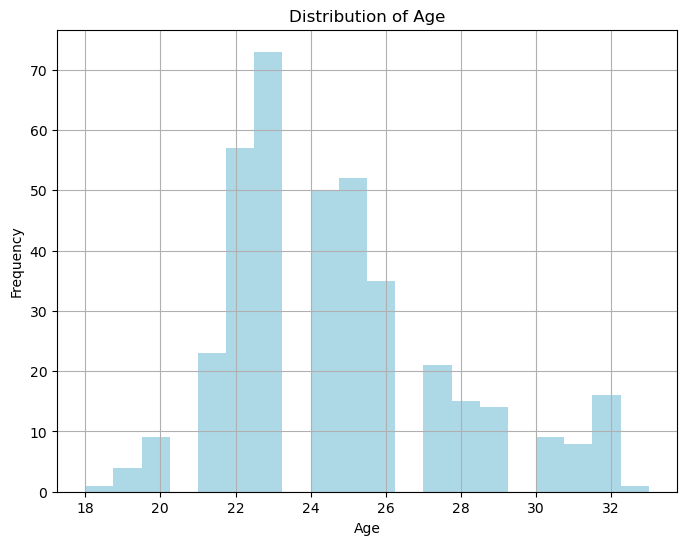

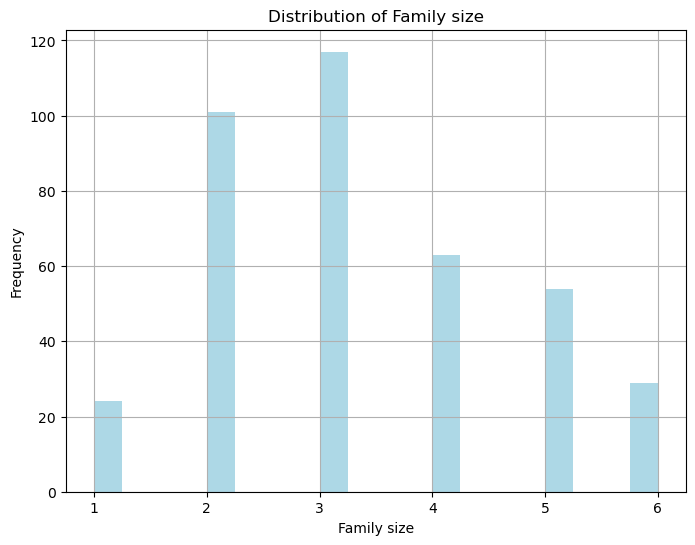

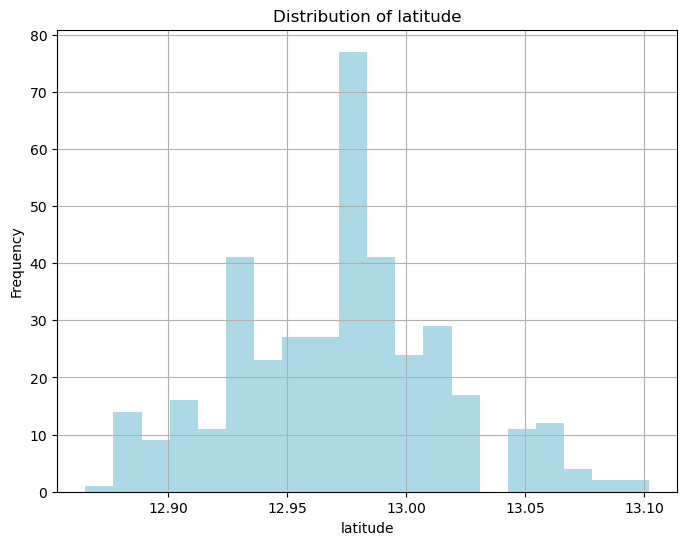

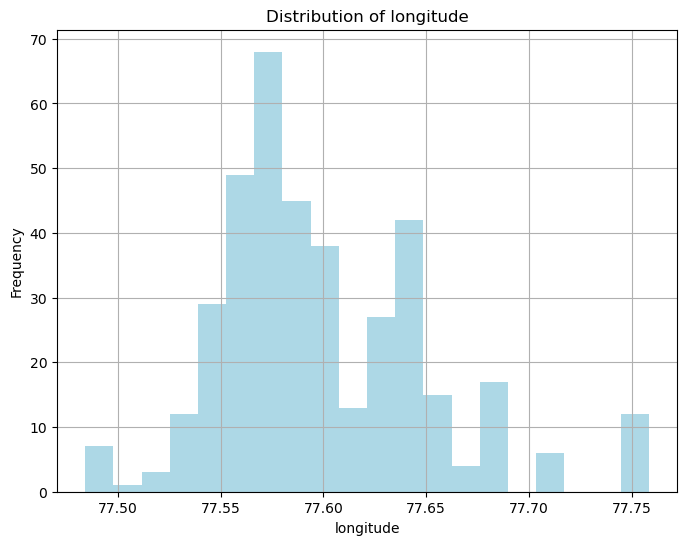

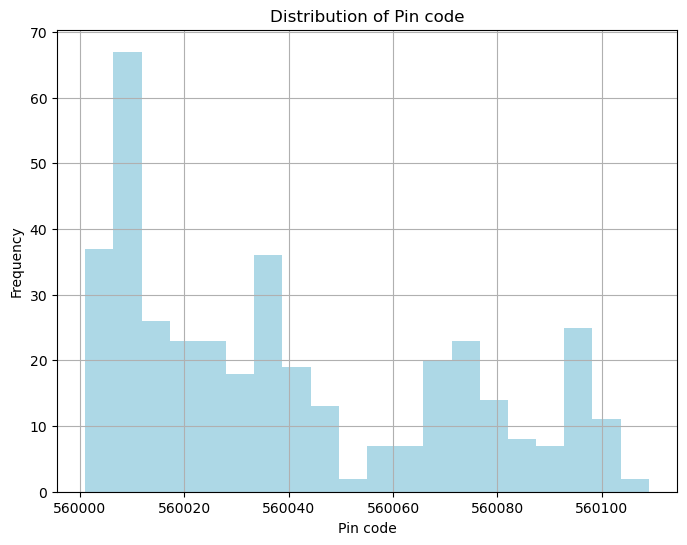

In [44]:
# Plot histograms for numerical columns
numerical_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(gdf[column], bins=20, color='lightblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

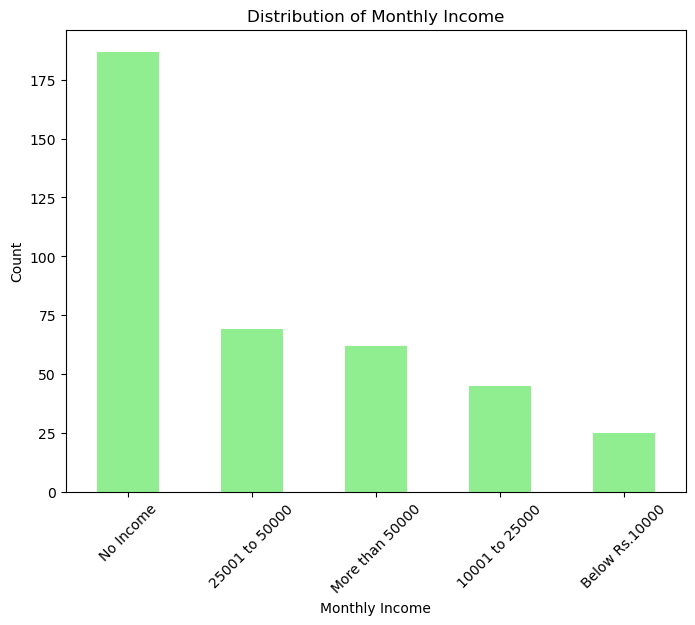

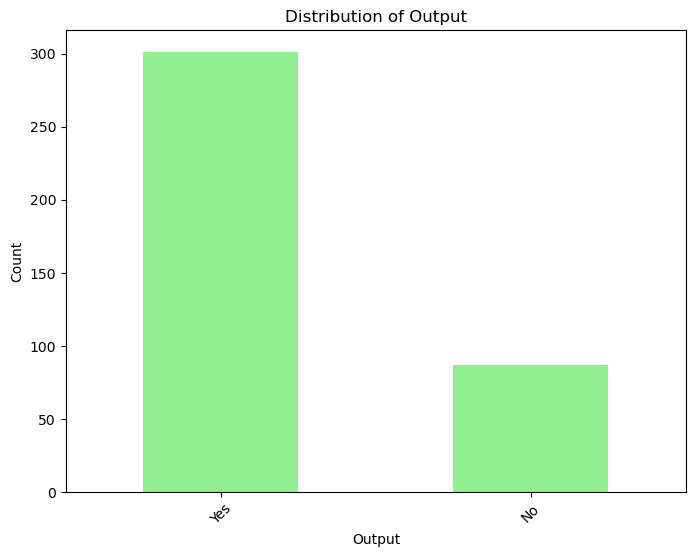

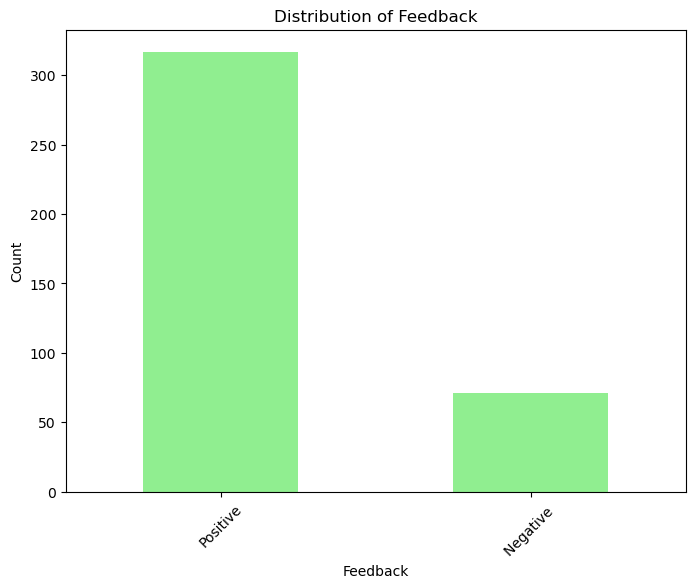

In [45]:
# Plot bar charts for categorical columns

categorical_columns = ['Monthly Income', 'Output', 'Feedback']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    gdf[column].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [46]:
gdf = pd.get_dummies(gdf, columns=['Gender', 'Marital Status'], drop_first=False)
print(gdf.columns)

Index(['Age', 'Occupation', 'Monthly Income', 'Educational Qualifications',
       'Family size', 'latitude', 'longitude', 'Pin code', 'Output',
       'Feedback', 'Unnamed: 12', 'Gender_Female', 'Gender_Male',
       'Marital Status_Married', 'Marital Status_Prefer not to say',
       'Marital Status_Single'],
      dtype='object')


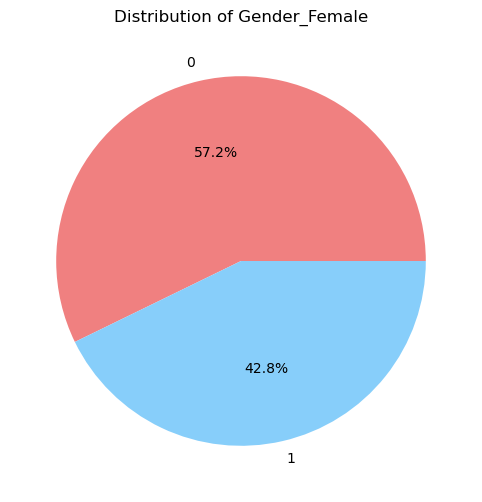

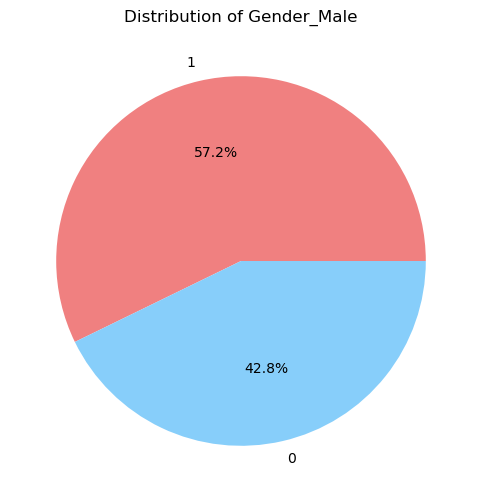

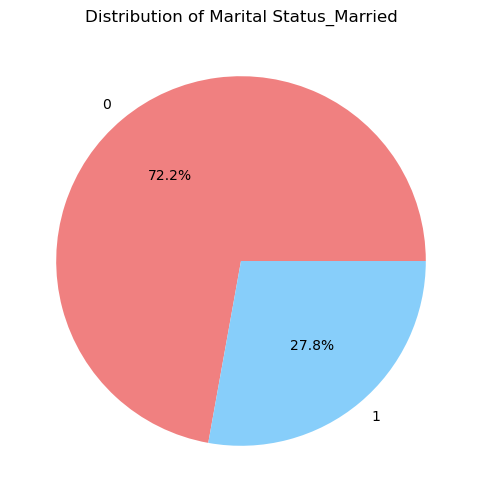

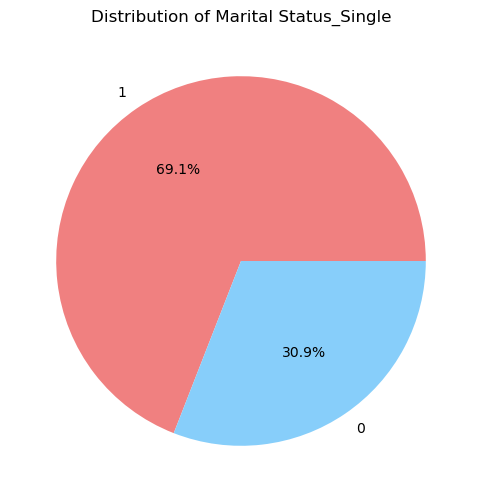

In [47]:
# Plot pie charts for binary columns
binary_columns = ['Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Single']
for column in binary_columns:
    plt.figure(figsize=(8, 6))
    gdf[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

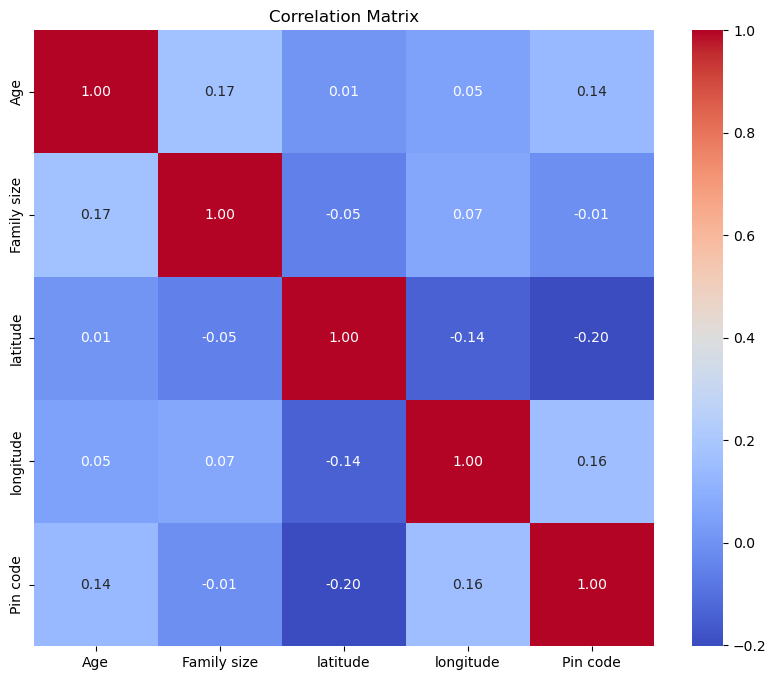

In [48]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(gdf[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

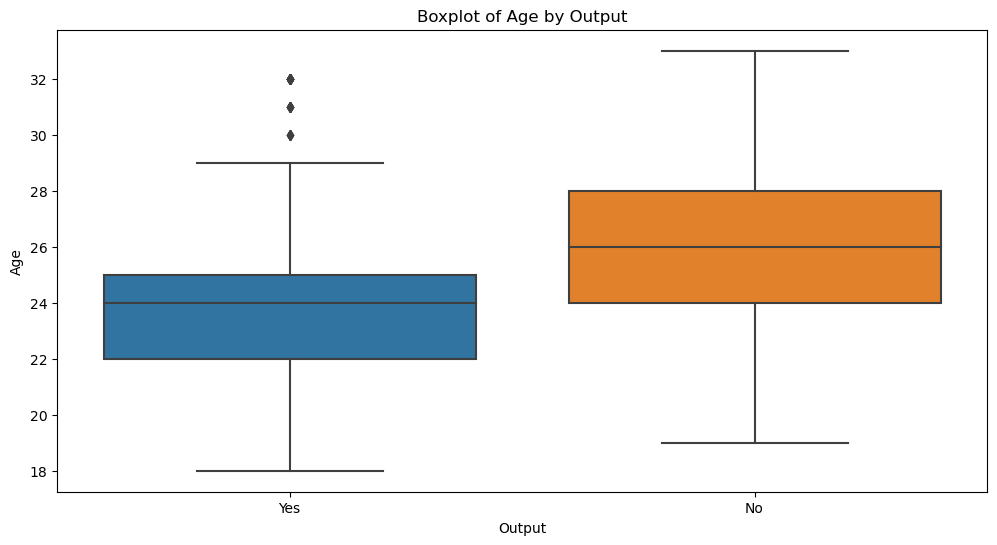

In [49]:
# Boxplots for numerical features grouped by categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Output', y='Age', data=gdf)
plt.title('Boxplot of Age by Output')
plt.show()

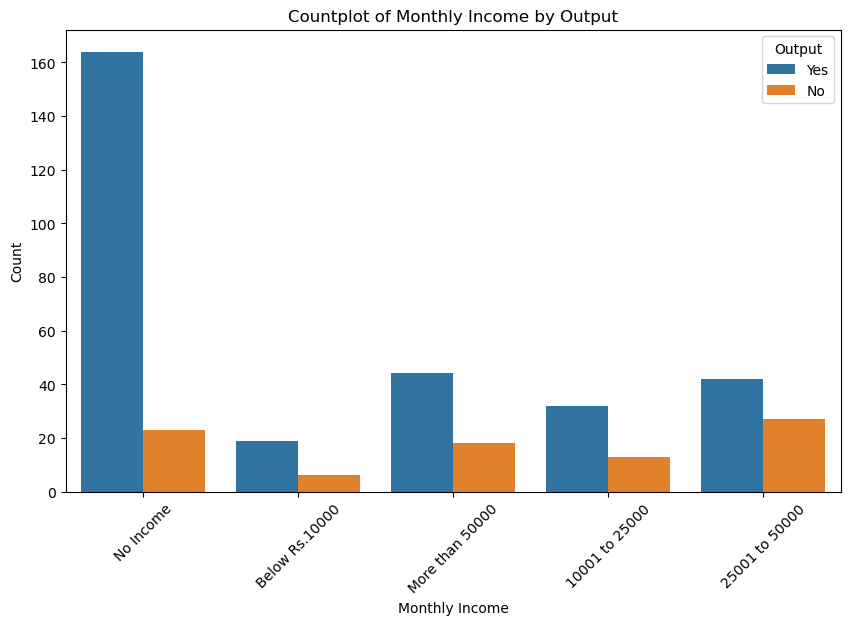

In [50]:
# Countplots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', data=gdf, hue='Output')
plt.title('Countplot of Monthly Income by Output')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Data Preparation
# 1. Handling Missing Values
# Assuming 'Feedback' column contains missing values, we can impute them with the most frequent value
gdf['Feedback'].fillna(gdf['Feedback'].mode()[0], inplace=True)

In [52]:
#2. Encoding remaining categorical variables
gdf_encoded = pd.get_dummies(gdf, columns=['Feedback'])
# Using one-hot encoding for 'Monthly Income' column
gdf_encoded = pd.get_dummies(gdf, columns=['Monthly Income'])

In [53]:
# 3. Feature Scaling
# Let's use StandardScaler to scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
gdf_encoded[numerical_columns] = scaler.fit_transform(gdf_encoded[numerical_columns])

# Data Splitting

In [54]:

# Split the data into features (X) and target variable (y)
X = gdf_encoded.drop(columns=['Output'])  # Features
y = gdf_encoded['Output']  # Target variable

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform target variable y
y = label_encoder.fit_transform(y)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print(X_train.dtypes)


Shape of X_train: (310, 19)
Shape of X_test: (78, 19)
Shape of y_train: (310,)
Shape of y_test: (78,)
Age                                 float64
Occupation                           object
Educational Qualifications           object
Family size                         float64
latitude                            float64
longitude                           float64
Pin code                            float64
Feedback                             object
Unnamed: 12                          object
Gender_Female                         uint8
Gender_Male                           uint8
Marital Status_Married                uint8
Marital Status_Prefer not to say      uint8
Marital Status_Single                 uint8
Monthly Income_10001 to 25000         uint8
Monthly Income_25001 to 50000         uint8
Monthly Income_Below Rs.10000         uint8
Monthly Income_More than 50000        uint8
Monthly Income_No Income              uint8
dtype: object


In [55]:
X_train = X_train.drop(columns=['Unnamed: 12'], errors='ignore')
X_test = X_test.drop(columns=['Unnamed: 12'], errors='ignore')


In [56]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Occupation', 'Educational Qualifications', 'Feedback']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Fit and transform training data
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))

# Transform test data
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Assign proper column names
X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns if they exist
X_train = X_train.drop(columns=categorical_cols, errors='ignore').reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols, errors='ignore').reset_index(drop=True)

# Concatenate encoded features back
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Ensure X_train and X_test are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)



# Modelling

In [57]:
#1. Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
# Evaluate the Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, linear_reg_predictions)
r2 = r2_score(y_test, linear_reg_predictions)
rmse=np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("R-squared:", rmse)

Mean Squared Error: 0.11042355268429487
R-squared: 0.15174634528882547
R-squared: 0.3323003952514876


In [58]:
#2. Random Forest Classifier Model

# 1. Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# 2. Instantiate and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# 3. Make predictions
rf_predictions = rf_classifier.predict(X_test)

# 4. Evaluation
# Compute MSE
rf_mse = mean_squared_error(y_test, rf_predictions)

# Compute R2 score
rf_r2 = r2_score(y_test, rf_predictions)

# Compute RMSE
rf_rmse = sqrt(rf_mse)

# Compute accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Classifier Evaluation:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2) Score:", rf_r2)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Accuracy Score:", rf_accuracy)


Random Forest Classifier Evaluation:
Mean Squared Error (MSE): 0.07692307692307693
R-squared (R2) Score: 0.40909090909090884
Root Mean Squared Error (RMSE): 0.2773500981126146
Accuracy Score: 0.9230769230769231


In [59]:
#3.Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from math import sqrt

# . SVM Model
svm_model = SVC(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train, y_train)

# 4. Making Predictions
svm_predictions = svm_model.predict(X_test)

# 5. Evaluating the Model
# Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predictions)
print("Mean Squared Error (MSE) for SVM:", svm_mse)

# R-squared (R2)
svm_r2 = r2_score(y_test, svm_predictions)
print("R-squared (R2) for SVM:", svm_r2)

# Root Mean Squared Error (RMSE)
svm_rmse = sqrt(svm_mse)
print("Root Mean Squared Error (RMSE) for SVM:", svm_rmse)

# Accuracy Score
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy Score for SVM:", svm_accuracy)


Mean Squared Error (MSE) for SVM: 0.14102564102564102
R-squared (R2) for SVM: -0.0833333333333337
Root Mean Squared Error (RMSE) for SVM: 0.3755338080994054
Accuracy Score for SVM: 0.8589743589743589


# MODEL COMPARISON

In [60]:
# Create lists to store evaluation metrics for each model
models = ['Linear Regression', 'Random Forest Classifier', 'Support Vector Machine']
mse_scores = [mse, rf_mse, svm_mse]
r2_scores = [r2, rf_r2, svm_r2]
rmse_scores = [rmse, rf_rmse, svm_rmse]
accuracy_scores = [None, rf_accuracy, svm_accuracy]  # Linear Regression doesn't have an accuracy score

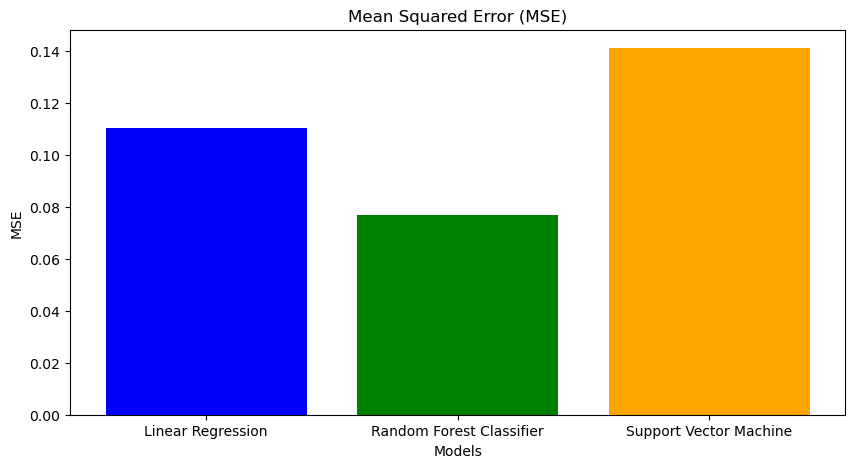

In [61]:
# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color=['blue', 'green', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

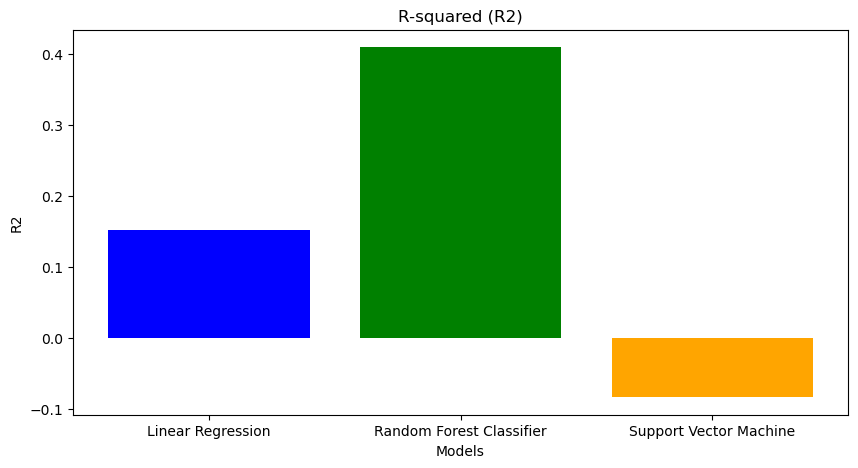

In [62]:
# Plot R-squared
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title('R-squared (R2)')
plt.xlabel('Models')
plt.ylabel('R2')
plt.show()

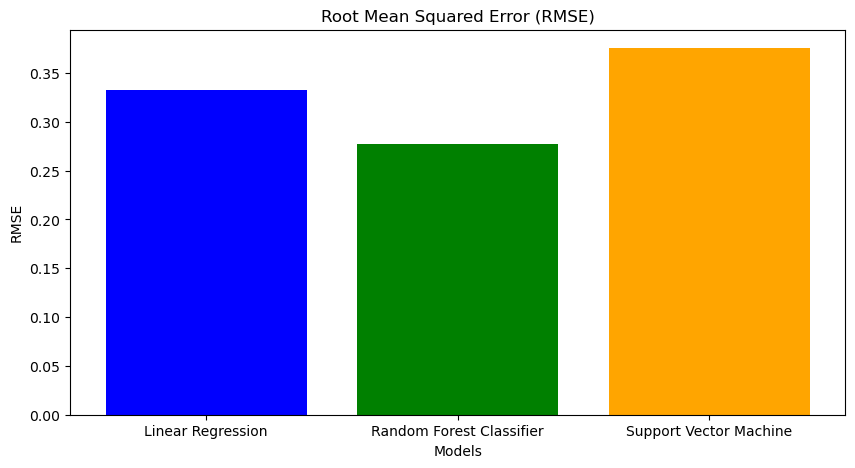

In [63]:
# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


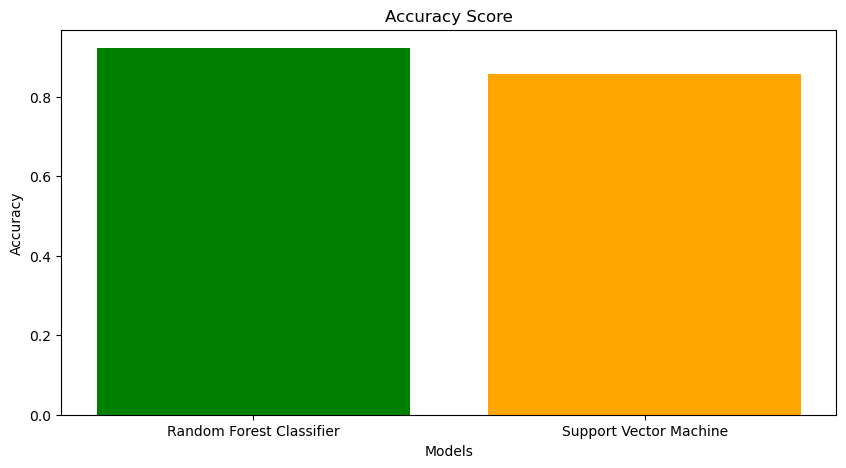

In [64]:
# Plot Accuracy Score
plt.figure(figsize=(10, 5))
plt.bar(models[1:], accuracy_scores[1:], color=['green', 'orange'])
plt.title('Accuracy Score')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()